## importing modules

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from ipywidgets import interact
from ipywidgets import interact_manual


In [87]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# data analysis

In [88]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn").bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000


In [89]:
#Getting all the unique values in each feature
features = df.columns
for feature in features:
    print(f"{feature} ---> {df[feature].nunique()}")

age ---> 47
sex ---> 2
bmi ---> 548
children ---> 6
smoker ---> 2
region ---> 4
charges ---> 1337


In [90]:
# checking null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
df.groupby('charges')['age'].agg({'min','mean','median','max'})

,mean,min,max,median
charges,,,,
1121.87390,18.0,18,18,18.0
1131.50660,18.0,18,18,18.0
1135.94070,18.0,18,18,18.0
1136.39940,18.0,18,18,18.0
1137.01100,18.0,18,18,18.0
...,...,...,...,...
55135.40209,33.0,33,33,33.0
58571.07448,31.0,31,31,31.0
60021.39897,52.0,52,52,52.0


In [96]:
##aggregate function - min,max,mean,median,coun
@interact
def groupby(col1 = df.select_dtypes('object').columns,
           col2 = df.select_dtypes('number').columns):
    return df.groupby(col1)[col2].agg({'min','mean','median','max'})

interactive(children=(Dropdown(description='col1', options=('sex', 'smoker', 'region'), value='sex'), Dropdown…

In [97]:
pd.crosstab(df['charges'],df['region'],margins=True)

region,northeast,northwest,southeast,southwest,All
charges,,,,,
1121.8739,0,0,1,0,1
1131.5066,0,0,1,0,1
1135.9407,0,0,1,0,1
1136.3994,0,0,1,0,1
1137.011,0,0,1,0,1
...,...,...,...,...,...
58571.07448,1,0,0,0,1
60021.39897,0,1,0,0,1
62592.87309,0,0,1,0,1


# data analysis with plots

- Single Numerical variable (`Continuous variable`):
    - Histogram
    - Distplot (pdf)
    - Boxplot
    - violinplot
    
- Single Categorical variable (`Descrete variable`):
    - pieplot
    - countplot
    - barplot (syntax is different)
    
- Numerical and Numerical variable:
    - Scatterplot
    - regplot
    - pairplot
    - relplot
    - heatmap
    
- categorical and numerical variable:
    - barplot
    - boxplot
    - scatterplot
    - violinplot
    - lineplot
    - swarmplot
    
- categorical and categorical variables:
    - do the crosstab then draw the barplot

<AxesSubplot:xlabel='sex'>

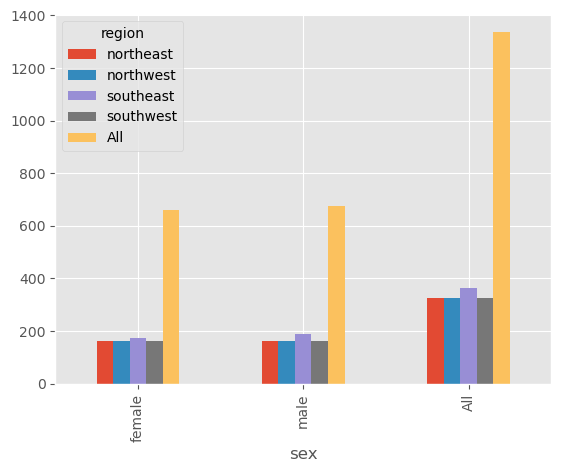

In [98]:
pd.crosstab(df['sex'],df['region'],margins=True).plot.bar()

##  Single numerical variable

<AxesSubplot:xlabel='age', ylabel='Count'>

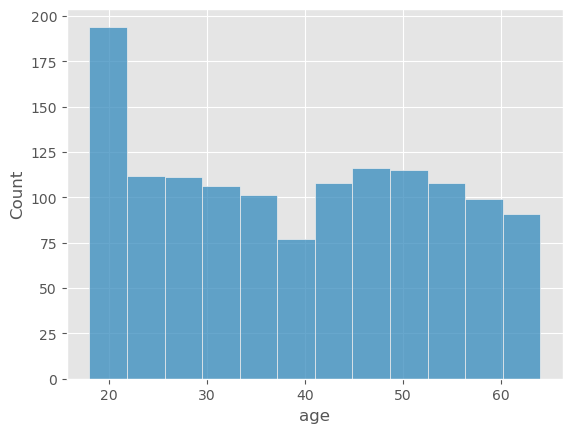

In [99]:
sns.histplot(df['age'])

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

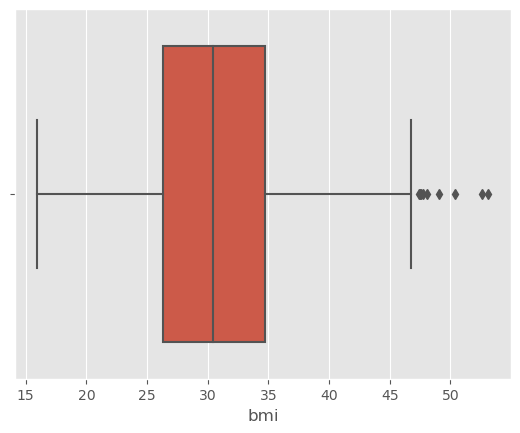

In [100]:
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='children', ylabel='Count'>

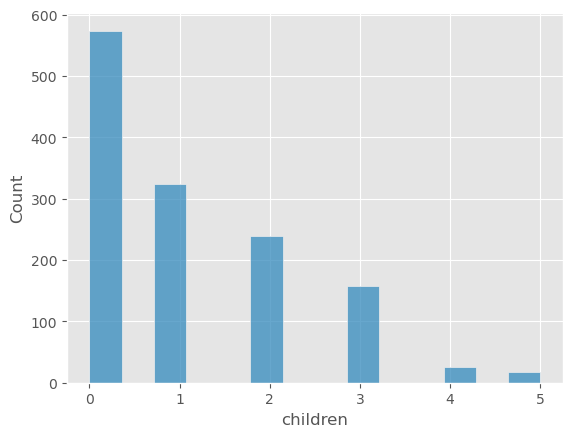

In [101]:
sns.histplot(df['children'])

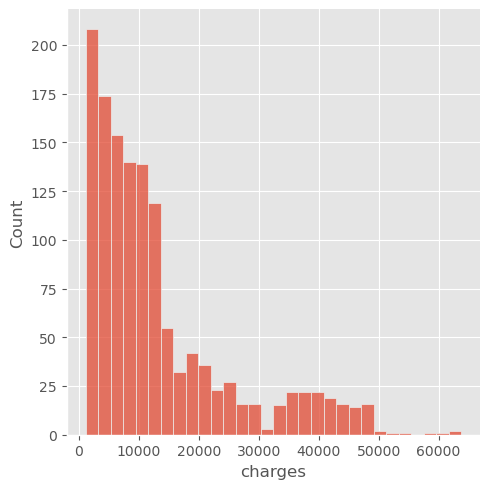

In [102]:
sns.displot(df['charges'])

## single categorical variable

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

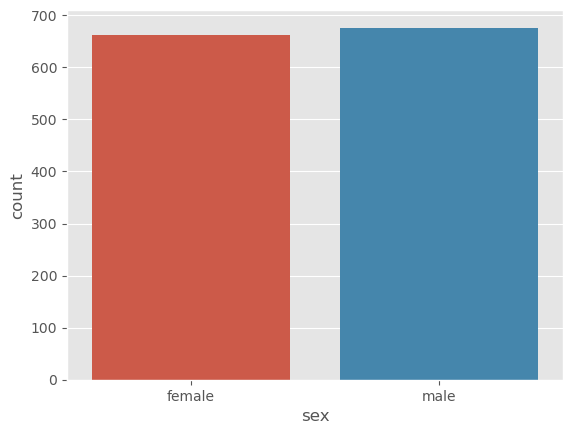

In [103]:
sns.countplot(df['sex'])

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

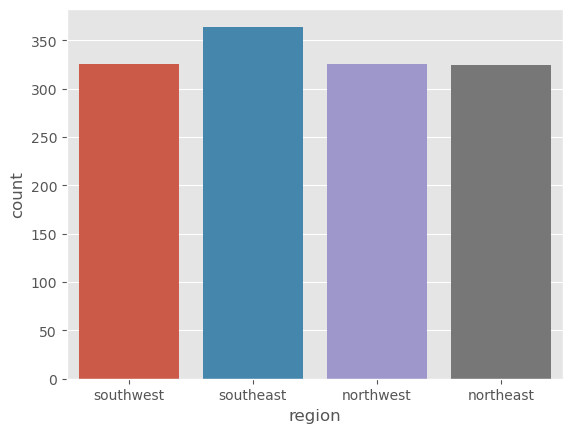

In [104]:
sns.countplot(df['region'])

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

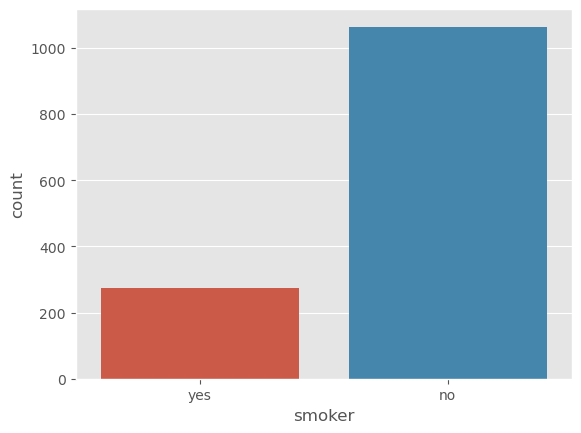

In [105]:
sns.countplot(df['smoker'])

# numerical and numerical varaible

C:\Users\adepu bharath kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

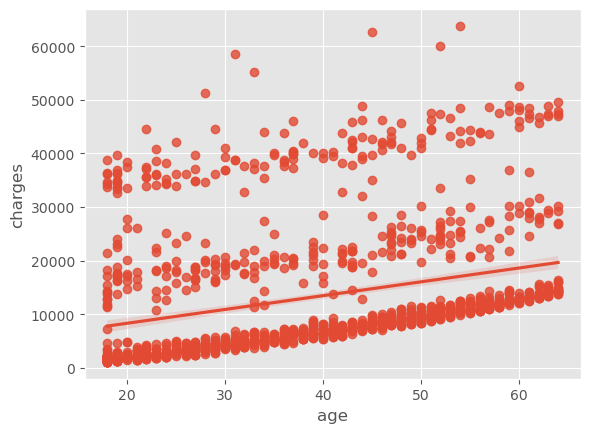

In [106]:
sns.regplot(df['age'],df['charges'])

In [107]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('number').columns):
    sns.jointplot(data = df,x = col1,y = col2,hue = 'sex');

interactive(children=(Dropdown(description='col1', options=('age', 'bmi', 'children', 'charges'), value='age')…

In [108]:
h=df.corr()

<AxesSubplot:>

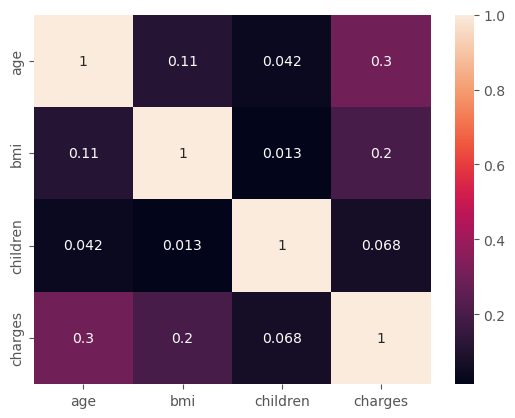

In [109]:

sns.heatmap(h,annot=True)

# single numrical and single categorical

In [110]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('object').columns):
    sns.barplot(data = df,x = col1,y = col2,hue = 'sex');

interactive(children=(Dropdown(description='col1', options=('age', 'bmi', 'children', 'charges'), value='age')…

In [111]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('object').columns):
    sns.boxplot(data = df,x = col1,y = col2,hue = 'sex');

interactive(children=(Dropdown(description='col1', options=('age', 'bmi', 'children', 'charges'), value='age')…

In [27]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('object').columns):
    sns.barplot(data = df,x = col1,y = col2,hue = 'sex');

interactive(children=(Dropdown(description='col1', options=('age', 'bmi', 'children', 'charges'), value='age')…

In [28]:
@interact_manual
def groupby(col1 = df.select_dtypes('number').columns,
           col2 = df.select_dtypes('object').columns):
    sns.violinplot(data = df,x = col1,y = col2,hue = 'sex');

interactive(children=(Dropdown(description='col1', options=('age', 'bmi', 'children', 'charges'), value='age')…

# one hot encoding 

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
encodeddata=ohe.fit_transform(df[['sex']]).todense()

In [30]:
col_names=ohe.categories_
df[['Female','Male']]=pd.DataFrame(encodeddata,columns=col_names)

df['Female']=df['Female'].astype('int')
df['Male']=df['Male'].astype('int')
df=df.drop('sex',axis=1)
df


,age,bmi,children,smoker,region,charges,Female,Male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


In [31]:
encodeddata=ohe.fit_transform(df[['smoker']]).todense()
col_names=ohe.categories_
df[['smoke_yes','smoke_no']]=pd.DataFrame(encodeddata,columns=col_names)
df['smoke_yes']=df['smoke_yes'].astype('int')
df['smoke_no']=df['smoke_no'].astype('int')
df=df.drop('smoker',axis=1)
df


,age,bmi,children,region,charges,Female,Male,smoke_yes,smoke_no
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0


In [32]:
encodeddata=ohe.fit_transform(df[['region']]).todense()
col_names=ohe.categories_
df[['Region_se','Region_sw','Region_nw','Region_ne']]=pd.DataFrame(encodeddata,columns=col_names)
df['Region_se']=df['Region_se'].astype('int')
df['Region_sw']=df['Region_sw'].astype('int')
df['Region_nw']=df['Region_nw'].astype('int')
df['Region_ne']=df['Region_ne'].astype('int')
df=df.drop('region',axis=1)
df

,age,bmi,children,charges,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## chossing X and y

In [39]:
# create x(features matrix)
X=df.drop('charges',axis=1)
# create y labels
y=df['charges']
X

,age,bmi,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


## train and test split

In [40]:
from sklearn.model_selection import train_test_split as split
X_train, X_test,y_train,y_test=split(X,y,test_size=0.25,random_state=0)
X_train


,age,bmi,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne
1075,32,29.59,1,1,0,1,0,0,0,1,0
131,61,22.04,0,1,0,1,0,1,0,0,0
15,19,24.60,1,0,1,1,0,0,0,0,1
1223,20,24.42,0,1,0,0,1,0,0,1,0
1137,26,22.23,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,27,26.03,0,0,1,1,0,1,0,0,0
835,42,35.97,2,0,1,1,0,0,0,1,0
1216,40,25.08,0,0,1,1,0,0,0,1,0
559,19,35.53,0,0,1,1,0,0,1,0,0


## standardization

In [41]:
X_train_N=X_train.iloc[:,[0,1]]
X_train_N

,age,bmi
1075,32,29.59
131,61,22.04
15,19,24.60
1223,20,24.42
1137,26,22.23
...,...,...
763,27,26.03
835,42,35.97
1216,40,25.08
559,19,35.53


In [42]:
from sklearn.preprocessing import StandardScaler
stnd=StandardScaler()
X_train_transform_N=stnd.fit_transform(X_train_N)
X_train_transform_N

array([[-0.51485346, -0.18133104],
       [ 1.54874618, -1.39313042],
       [-1.43991536, -0.98224215],
       ...,
       [ 0.05441541, -0.9052006 ],
       [-1.43991536,  0.77205813],
       [-0.44369485, -1.96131184]])

In [43]:
X_train_transform_N[0:]

array([[-0.51485346, -0.18133104],
       [ 1.54874618, -1.39313042],
       [-1.43991536, -0.98224215],
       ...,
       [ 0.05441541, -0.9052006 ],
       [-1.43991536,  0.77205813],
       [-0.44369485, -1.96131184]])

In [44]:
X_train[['Age_t','bmi_t']]=X_train_transform_N

In [45]:
X_train


,age,bmi,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne,Age_t,bmi_t
1075,32,29.59,1,1,0,1,0,0,0,1,0,-0.514853,-0.181331
131,61,22.04,0,1,0,1,0,1,0,0,0,1.548746,-1.393130
15,19,24.60,1,0,1,1,0,0,0,0,1,-1.439915,-0.982242
1223,20,24.42,0,1,0,0,1,0,0,1,0,-1.368757,-1.011133
1137,26,22.23,0,1,0,1,0,0,1,0,0,-0.941805,-1.362635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,27,26.03,0,0,1,1,0,1,0,0,0,-0.870646,-0.752723
835,42,35.97,2,0,1,1,0,0,0,1,0,0.196733,0.842680
1216,40,25.08,0,0,1,1,0,0,0,1,0,0.054415,-0.905201
559,19,35.53,0,0,1,1,0,0,1,0,0,-1.439915,0.772058


In [ ]:
# scalling -- after train test split

# encoding--- before train test split

In [63]:
#X_train=X_train.drop(['age','bmi'],axis=1)
X_train_transform=X_train
X_train_transform=X_train_transform.drop(['age','bmi'],axis=1)
X_train_transform

,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne,Age_t,bmi_t
1075,1,1,0,1,0,0,0,1,0,-0.514853,-0.181331
131,0,1,0,1,0,1,0,0,0,1.548746,-1.393130
15,1,0,1,1,0,0,0,0,1,-1.439915,-0.982242
1223,0,1,0,0,1,0,0,1,0,-1.368757,-1.011133
1137,0,1,0,1,0,0,1,0,0,-0.941805,-1.362635
...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,1,1,0,1,0,0,0,-0.870646,-0.752723
835,2,0,1,1,0,0,0,1,0,0.196733,0.842680
1216,0,0,1,1,0,0,0,1,0,0.054415,-0.905201
559,0,0,1,1,0,0,1,0,0,-1.439915,0.772058


In [48]:
X_test_N=X_test.iloc[:,[0,1]]
X_test_N

,age,bmi
578,52,30.200
610,47,29.370
569,48,40.565
1034,61,38.380
198,51,18.050
...,...,...
574,57,34.295
1174,29,32.110
1327,51,30.030
817,23,37.100


In [49]:
X_test_transform=stnd.transform(X_test_N)

In [195]:
X_test                    


,age,bmi,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne
578,52,30.200,1,0,1,1,0,0,0,0,1
610,47,29.370,1,1,0,1,0,0,0,1,0
569,48,40.565,2,0,1,0,1,0,1,0,0
1034,61,38.380,0,0,1,1,0,0,1,0,0
198,51,18.050,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
574,57,34.295,2,1,0,1,0,1,0,0,0
1174,29,32.110,2,0,1,1,0,0,1,0,0
1327,51,30.030,1,0,1,1,0,0,0,1,0
817,23,37.100,3,0,1,1,0,0,0,0,1


In [59]:
X_test[['Age_t','bmi_t']]=X_test_transform
#X_test=X_test.drop(['age','bmi'],axis=1)
X_test
X_test_Tranform=X_test
X_test_Tranform

,children,Female,Male,smoke_yes,smoke_no,Region_se,Region_sw,Region_nw,Region_ne,Age_t,bmi_t
578,1,0,1,1,0,0,0,0,1,0.908319,-0.083424
610,1,1,0,1,0,0,0,1,0,0.552526,-0.216642
569,2,0,1,0,1,0,1,0,0,0.623684,1.580192
1034,0,0,1,1,0,0,1,0,0,1.548746,1.229492
198,0,1,0,1,0,0,1,0,0,0.837160,-2.033538
...,...,...,...,...,...,...,...,...,...,...,...
574,2,1,0,1,0,1,0,0,0,1.264112,0.573837
1174,2,0,1,1,0,0,1,0,0,-0.728329,0.223137
1327,1,0,1,1,0,0,0,1,0,0.837160,-0.110710
817,3,0,1,1,0,0,0,0,1,-1.155281,1.024048


## Model building

## Regression

In [65]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train_transform,y_train)

LinearRegression()

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.fit(X_train_transform,y_train)

KNeighborsRegressor()

In [70]:
from sklearn.svm import SVR
svr_reg=SVR()
svr_reg.fit(X_train_transform,y_train)

SVR()

In [71]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()
decision.fit(X_train_transform,y_train)

DecisionTreeRegressor()

In [72]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(X_train_transform,y_train)

RandomForestRegressor()

## Prediction and Evaluation

In [74]:
from sklearn import metrics
y_test_pred=linear_reg.predict(X_test_Tranform)
metrics.mean_absolute_error(y_test,y_test_pred)

4012.715276853084

In [76]:
from sklearn import metrics
y_test_pred=knn_reg.predict(X_test_Tranform)
metrics.mean_absolute_error(y_test,y_test_pred)

3606.569955280597

In [77]:
from sklearn import metrics
y_test_pred=decision.predict(X_test_Tranform)
metrics.mean_absolute_error(y_test,y_test_pred)

2800.0002691910445

In [78]:
from sklearn import metrics
y_test_pred=random_forest.predict(X_test_Tranform)
metrics.mean_absolute_error(y_test,y_test_pred)

2721.1582932765173

In [79]:
from sklearn import metrics
y_test_pred=svr_reg.predict(X_test_Tranform)
metrics.mean_absolute_error(y_test,y_test_pred)

8546.64785463181

In [112]:
score={'Algorithms':['Linear Regression','KNN','Desision tree','Random forest','SVR'],'Scores':[4012.71,3606.56,2800.00,2721.15,8546.64]}

In [113]:
scores=pd.DataFrame(score)

In [114]:
scores

,Algorithms,Scores
0,Linear Regression,4012.71
1,KNN,3606.56
2,Desision tree,2800.00
3,Random forest,2721.15
4,SVR,8546.64


<AxesSubplot:xlabel='Algorithms', ylabel='Scores'>

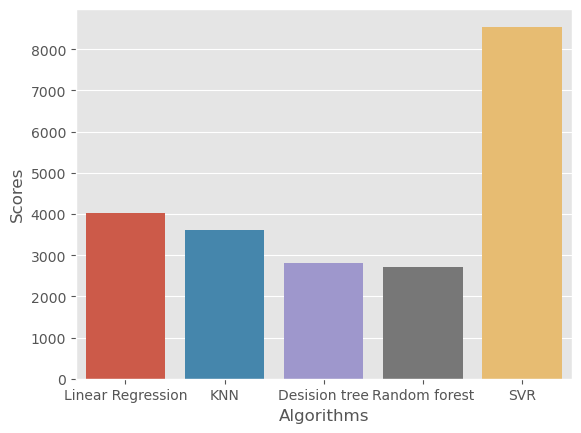

In [115]:
sns.barplot(data=scores,x=scores['Algorithms'],y=scores['Scores'],)

In [ ]:
# Suppport vector Regression got score of 85% ,it is the best fit algorothms for the medical cost prediction
